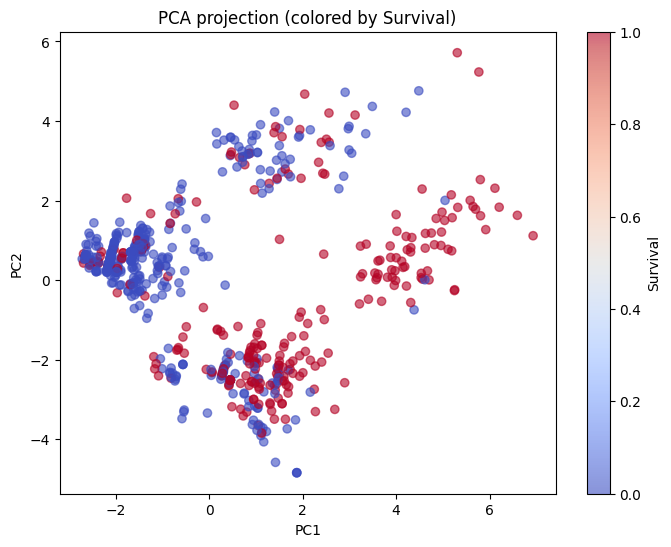

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA

x_train=pd.read_csv("../data/processed/train.csv",delimiter=",").drop(columns="PassengerId")
y_train=pd.read_csv("../data/processed/train_output.csv",delimiter=",")
x_test=pd.read_csv("../data/processed/test.csv",delimiter=",").drop(columns="PassengerId")


#Splitting the Data set
x_train,cv_train,y_train,cv_train_output=train_test_split(x_train,y_train,test_size=0.2,random_state=42)

#Plotting the Data using PCA
x_train_oneHot=pd.get_dummies(x_train,columns=["Sex","CabinLetter","TicketPrefix","Pclass","Title","Embarked"])
x_scaled=StandardScaler().fit_transform(x_train_oneHot)
pca = PCA(n_components=2)  
x_pca = pca.fit_transform(x_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(
    x_pca[:, 0],
    x_pca[:, 1],
    c=[y_train],            
    cmap="coolwarm",
    alpha=0.6
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA projection (colored by Survival)")
plt.colorbar(scatter, label="Survival")

plt.show()

In [ ]:
#Training the Model using Logistic Regression
oneHot_features=["Sex","Pclass","Embarked","TicketPrefix","Title","CabinLetter"]
num_features=["Age","FamilySize","Fare","isAlone"]

preprocessing=ColumnTransformer([
    ("oneHot",OneHotEncoder(handle_unknown="ignore"),oneHot_features),
    ("num",StandardScaler(),num_features)
])

model=Pipeline([
    ("pre",preprocessing),
    ("clf",LogisticRegression(max_iter=1000,random_state=42))
])

model.fit(x_train,y_train)


prediction=model.predict(cv_train)
prediction_test=model.predict(x_test)

print("Accuracy Score:",accuracy_score(cv_train_output,prediction))
print("Confusion metrics:",confusion_matrix(cv_train_output,prediction))
print("Classification Report:",classification_report(cv_train_output,prediction))

Accuracy Score 0.8156424581005587
Confusion metrics [[90 15]
 [18 56]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
